In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,1
1,5.0,4.0,NaN,5.0,NaN,10.0,NaN,NaN,1
2,NaN,1.0,NaN,1.0,NaN,2.0,NaN,1.0,1
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,NaN,1.0,NaN,3.0,NaN,1.0,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
680,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3
681,NaN,1.0,NaN,3.0,NaN,1.0,NaN,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	66
float64		column 2	70
float64		column 3	268
float64		column 4	169
float64		column 5	165
float64		column 6	103
float64		column 7	231
float64		column 8	132
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,617.000000,613.000000,415.000000,514.000000,518.000000,580.000000,452.000000,551.000000,683.000000
mean,4.435981,3.099511,3.231325,2.896887,3.152510,3.532759,3.325221,2.914701,1.603221
std,2.832935,3.023041,2.914976,2.925833,2.113305,3.642575,2.385838,3.096917,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,5.000000,4.000000,4.000000,6.000000,4.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

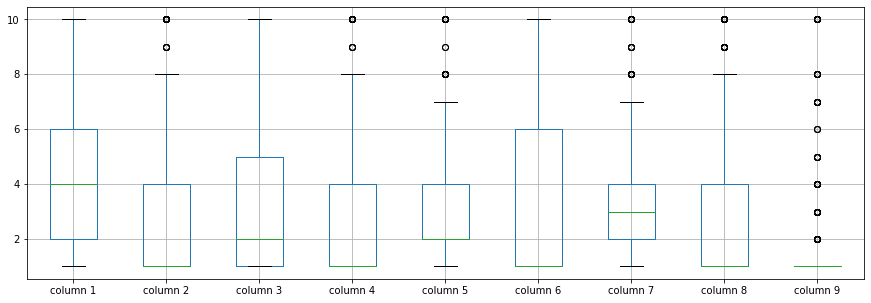

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.435981
column 2    3.099511
column 3    3.231325
column 4    2.896887
column 5    3.152510
column 6    3.532759
column 7    3.325221
column 8    2.914701
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.636246,0.626254,0.454307,0.520120,0.596969,0.517119,0.528313,0.334782
column 2,0.636246,1.000000,0.899477,0.694798,0.726139,0.685933,0.719905,0.678574,0.452910
column 3,0.626254,0.899477,1.000000,0.650111,0.676344,0.677171,0.696178,0.700445,0.408878
column 4,0.454307,0.694798,0.650111,1.000000,0.548906,0.652097,0.637973,0.525259,0.412937
column 5,0.520120,0.726139,0.676344,0.548906,1.000000,0.558795,0.619301,0.629485,0.456858
column 6,0.596969,0.685933,0.677171,0.652097,0.558795,1.000000,0.648718,0.554301,0.335568
column 7,0.517119,0.719905,0.696178,0.637973,0.619301,0.648718,1.000000,0.625630,0.308590
column 8,0.528313,0.678574,0.700445,0.525259,0.629485,0.554301,0.625630,1.000000,0.423449
column 9,0.334782,0.452910,0.408878,0.412937,0.456858,0.335568,0.308590,0.423449,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+43,9+43+43,9+43+43,9+43+43+43+43,9+43+43+43,9+43+43,9+43,9], vae_layer = False, seed = 430)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.21775754292806
Epoch: 1 , loss: 29.131705011640275
Epoch: 2 , loss: 29.063040120261057
Epoch: 3 , loss: 28.864425432114373
Epoch: 4 , loss: 27.83038291477022
Epoch: 5 , loss: 25.615612143561954
Epoch: 6 , loss: 25.087821415492467
Epoch: 7 , loss: 24.498795373099192
Epoch: 8 , loss: 24.058015255700973
Epoch: 9 , loss: 23.86276996703375
Epoch: 10 , loss: 23.621959708985827
Epoch: 11 , loss: 23.358474935804093
Epoch: 12 , loss: 22.657581760769798
Epoch: 13 , loss: 22.22298592612857
Epoch: 14 , loss: 22.002024718693324
Epoch: 15 , loss: 21.41298566545759
Epoch: 16 , loss: 20.892154852549236
Epoch: 17 , loss: 20.84465151741391
Epoch: 18 , loss: 20.638063771384104
Epoch: 19 , loss: 20.392317136128742
Epoch: 20 , loss: 20.2771227927435
Epoch: 21 , loss: 20.492634750547865
Epoch: 22 , loss: 20.52102363677252
Epoch: 23 , loss: 20.483869529905775
Epoch: 24 , loss: 19.780953157515754
Epoch: 25 , loss: 19.721448

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    1.934533
column 2    1.000000
column 3    1.391858
column 4    1.000000
column 5    2.000000
column 6    1.000000
column 7    1.422912
column 8    1.284797
column 9    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.0,1.069327,0.869425,0.000000,0.0,-0.733970,1.013887,0
1,0.000000,0.0,0.657956,0.000000,-2.187292,0.0,2.093377,2.091055,0
2,-1.772552,0.0,-0.263560,0.000000,-1.096243,0.0,-2.128150,0.000000,0
3,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
4,2.563809,0.0,3.562638,0.000000,2.726279,0.0,1.819350,0.000000,0
...,...,...,...,...,...,...,...,...,...
678,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
679,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
680,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
681,0.344777,0.0,-0.006250,0.000000,-1.000090,0.0,0.045817,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(105.99927274984053, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.316106052393741

In [18]:
new_df.iloc[66,:]

column 1    1.000000
column 2    3.000000
column 3    1.285880
column 4    1.108427
column 5    2.000000
column 6    1.387722
column 7    1.356640
column 8    2.000000
column 9    1.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.000000,1.0,2.069327,1.869425,2.000000,1.0,2.266030,2.013887,1
1,5.000000,4.0,4.657956,5.000000,4.812708,10.0,5.093377,4.091055,1
2,1.227448,1.0,0.736440,1.000000,0.903757,2.0,0.871850,1.000000,1
3,6.000000,8.0,8.000000,1.000000,3.000000,4.0,3.000000,7.000000,1
4,6.563809,1.0,4.562638,3.000000,4.726279,1.0,4.819350,1.000000,1
...,...,...,...,...,...,...,...,...,...
678,3.000000,1.0,1.000000,1.000000,2.000000,1.0,2.000000,1.000000,1
679,2.000000,1.0,1.000000,1.000000,2.000000,1.0,3.000000,1.000000,1
680,5.000000,10.0,10.000000,10.000000,4.000000,10.0,5.000000,6.000000,3
681,1.344777,1.0,0.993750,3.000000,0.999910,1.0,1.045817,1.000000,1


In [20]:
imputations[-1].to_excel("BCW_AE_20(imp).xlsx", index=False, header=False)